In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dispaly all columns 
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [130]:
df=pd.read_csv("housets.csv")

In [25]:
df.shape

(1460, 81)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [28]:
df["Id"].isnull().sum()

0

In [29]:
[i for i in df.columns ]

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [30]:
[i for i in df.columns if df[str(i)].isnull().sum() > 0 ]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
features_with_na =[i for i in df.columns if df[i].isnull().sum() > 0 ]
for i in features_with_na:
    print(i,round(df[i].isnull().mean(),4) , " " ,"% missing values" )

LotFrontage 0.1774   % missing values
Alley 0.9377   % missing values
MasVnrType 0.0055   % missing values
MasVnrArea 0.0055   % missing values
BsmtQual 0.0253   % missing values
BsmtCond 0.0253   % missing values
BsmtExposure 0.026   % missing values
BsmtFinType1 0.0253   % missing values
BsmtFinType2 0.026   % missing values
Electrical 0.0007   % missing values
FireplaceQu 0.4726   % missing values
GarageType 0.0555   % missing values
GarageYrBlt 0.0555   % missing values
GarageFinish 0.0555   % missing values
GarageQual 0.0555   % missing values
GarageCond 0.0555   % missing values
PoolQC 0.9952   % missing values
Fence 0.8075   % missing values
MiscFeature 0.963   % missing values


In [74]:
print("no of missing features is {}".format(len(features_with_na)))

no of missing features is 19


In [32]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [33]:
data=df.copy()

In [34]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [37]:
for features in features_with_na:
     data[features]=np.where(data[features].isnull() == True ,0 ,1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,1,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,1,Gd,TA,PConc,1,1,1,1,706,1,0,150,856,GasA,Ex,Y,1,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,1,1,1,2,548,1,1,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,1,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,1,1,TA,TA,CBlock,1,1,1,1,978,1,0,284,1262,GasA,Ex,Y,1,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1,1,1,1,2,460,1,1,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,1,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,1,Gd,TA,PConc,1,1,1,1,486,1,0,434,920,GasA,Ex,Y,1,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,1,1,1,1,2,608,1,1,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,1,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,1,1,TA,TA,BrkTil,1,1,1,1,216,1,0,540,756,GasA,Gd,Y,1,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1,1,1,1,3,642,1,1,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,1,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,1,1,Gd,TA,PConc,1,1,1,1,655,1,0,490,1145,GasA,Ex,Y,1,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,1,1,1,1,3,836,1,1,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,1,7917,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,1,1,TA,TA,PConc,1,1,1,1,0,1,0,953,953,GasA,Ex,Y,1,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,1,1,1,1,2,460,1,1,Y,0,40,0,0,0,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,1,13175,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,1,1,TA,TA,CBlock,1,1,1,1,790,1,163,589,1542,GasA,TA,Y,1,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,1,1,1,1,2,500,1,1,Y,349,0,0,0,0,0,0,1,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,1,9042,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,1,1,Ex,Gd,Stone,1,1,1,1,275,1,0,877,1152,GasA,Ex,Y,1,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,1,1,1,1,252,1,1,Y,0,60,0,0,0,0,0,1,1,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,1,9717,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,1,1,TA,TA,CBlock,1,1,1,1,49,1,1029,0,1078,GasA,Gd,Y,1,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,0,1,1,1,1,240,1,1,Y,366,0,112,0,0,0,0,0,0,0,4,2010,WD,Normal,142125


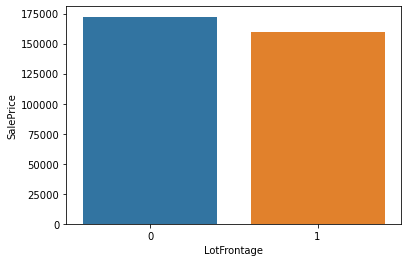

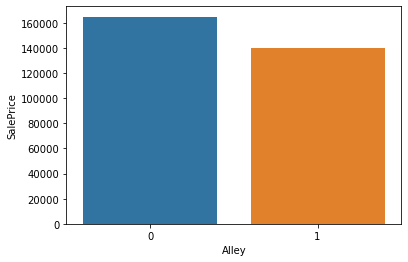

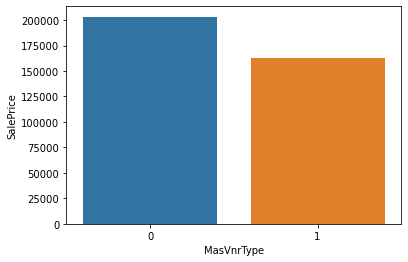

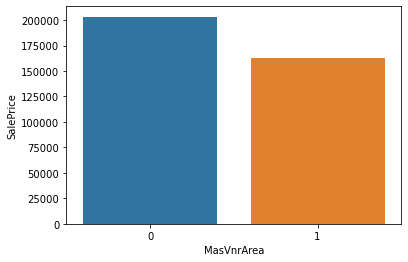

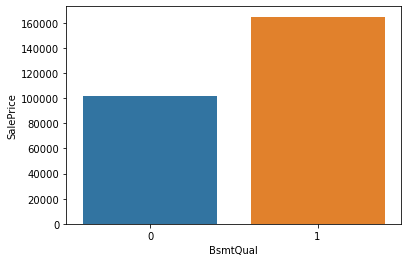

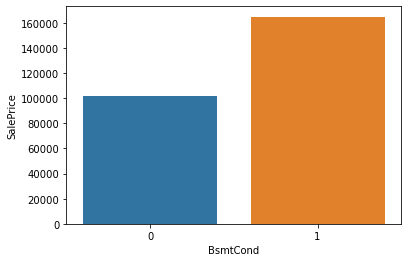

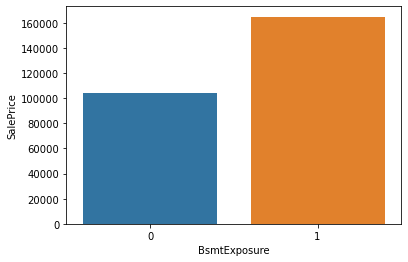

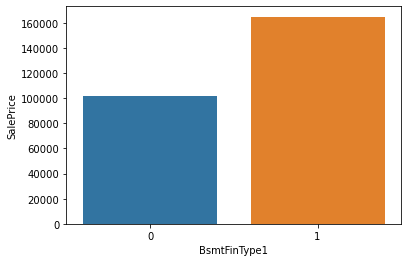

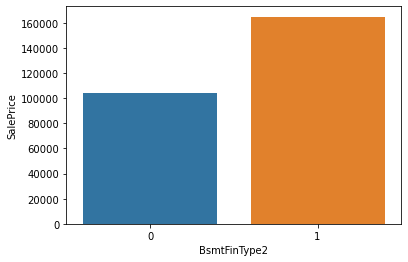

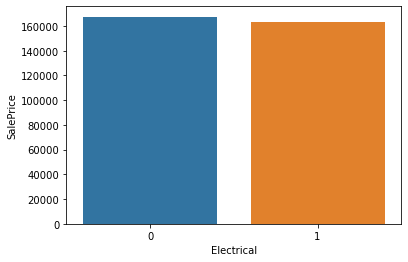

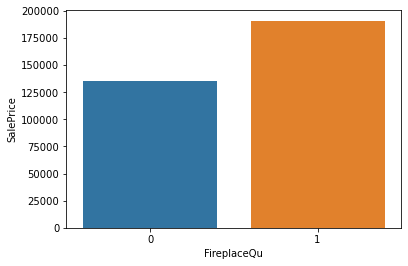

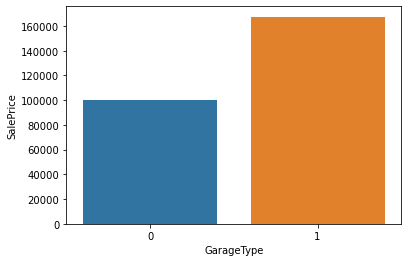

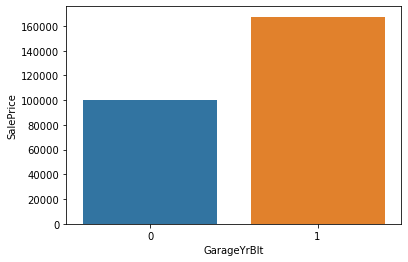

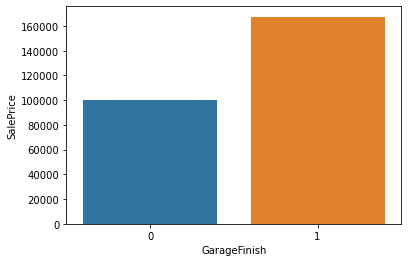

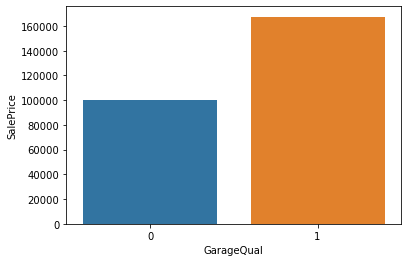

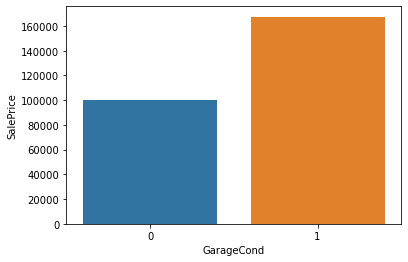

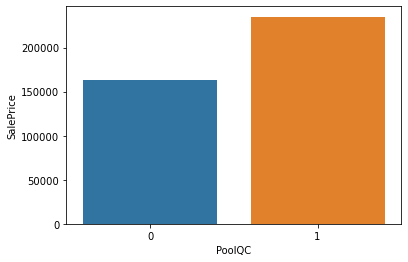

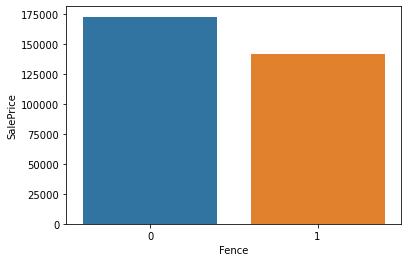

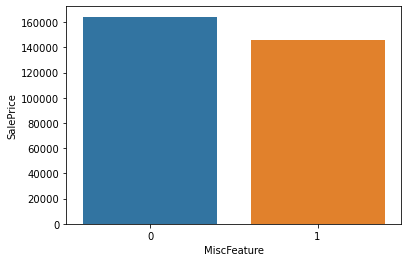

In [55]:
for features in features_with_na:
    a=data.groupby(features)['SalePrice'].median().reset_index()
    sns.barplot(x=features ,y = 'SalePrice',data=a)
    plt.show() #plt.show to show all graph if not written it will show only last graph

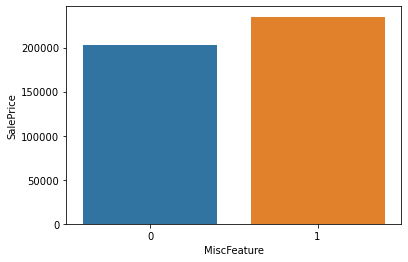

In [49]:
for features in features_with_na:
    sns.barplot(x=features ,y = 'SalePrice',data=data.groupby(features)['SalePrice'].median().reset_index())

In [63]:
df["Id"].dtypes

dtype('int64')

In [61]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [66]:
# dtype not equalt to "0" mean not object i.e. string or strinh with values
feature_with_numerical= [i for i in df.columns if df[i].dtypes != 'O']
feature_with_numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [69]:
df[["Id" ,'SalePrice']].head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [72]:
print("no of numerical features is {}".format(len(feature_with_numerical)))
df[feature_with_numerical].head()

no of numerical features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [77]:
date_time_feature=[i for i in feature_with_numerical if "Yr" in i or "Year" in i ]
# observe or statement above
date_time_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

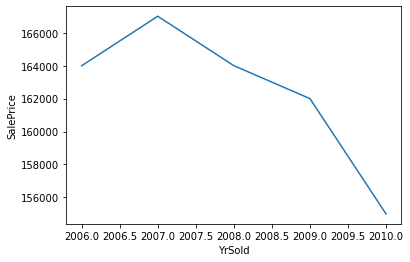

In [78]:
ys=data.groupby('YrSold')['SalePrice'].median().reset_index()
sns.lineplot(x='YrSold' ,y = 'SalePrice',data=ys)
    

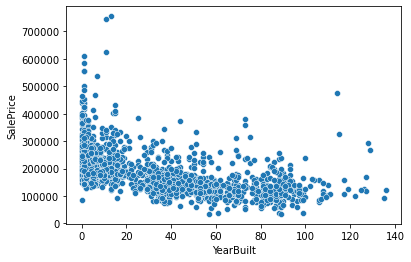

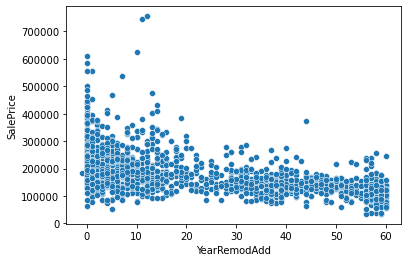

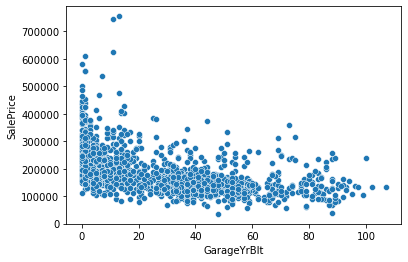

In [85]:
data=df.copy()
for features in date_time_feature:
    if features!='YrSold':
        data[features] = data['YrSold']-data[features]
        sns.scatterplot(x=features,y = 'SalePrice',data=data)
        plt.show()
    
    
    

In [87]:
discrete_feature =[i for i in df.columns if len(df[i].unique())<25  and i not in date_time_feature and i not in ["Id"]]
print("no of discrete features is {}".format(len(discrete_feature)))
discrete_feature

no of discrete features is 59


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

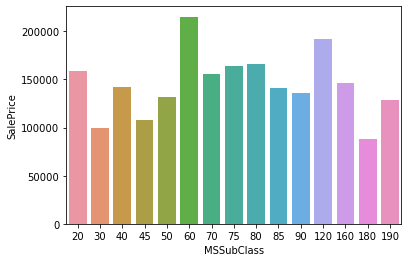

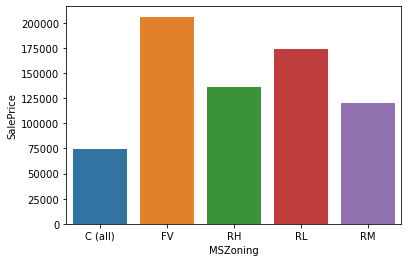

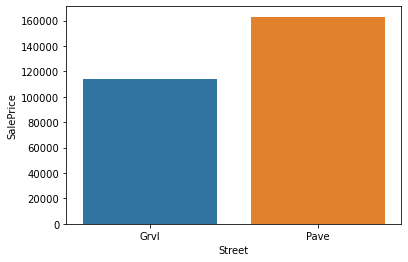

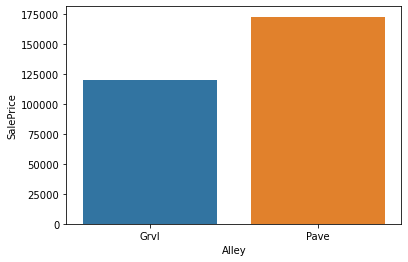

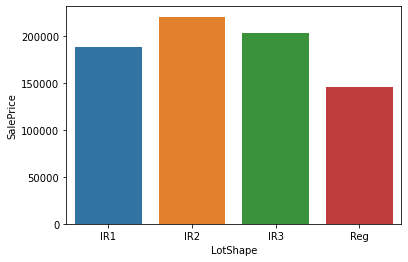

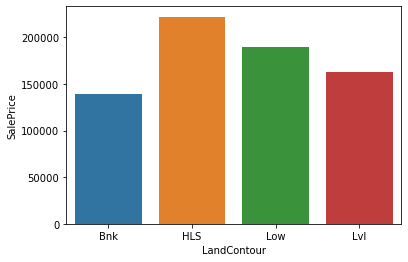

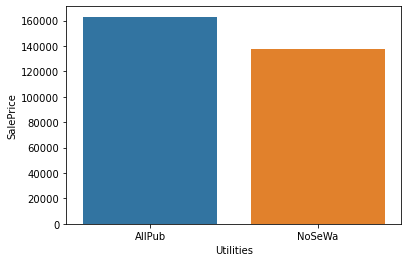

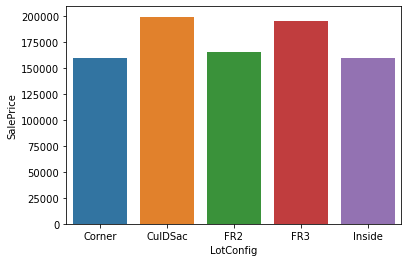

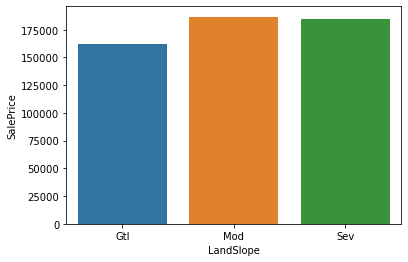

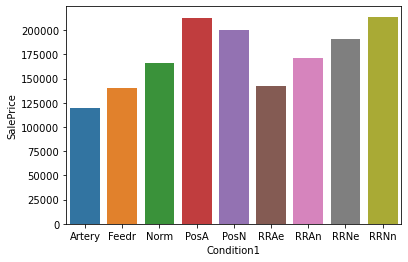

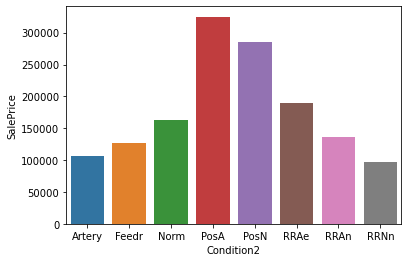

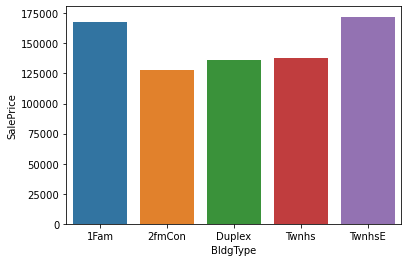

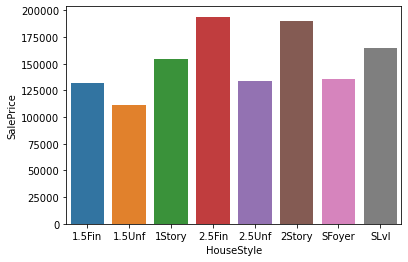

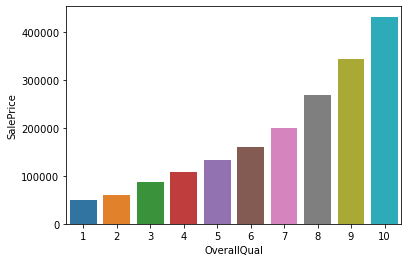

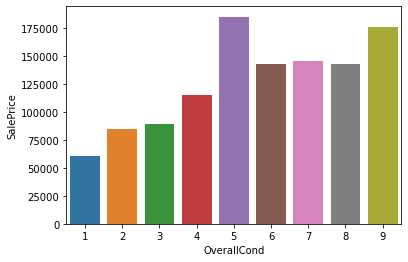

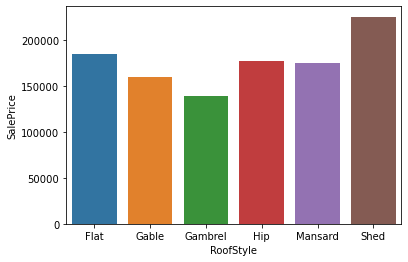

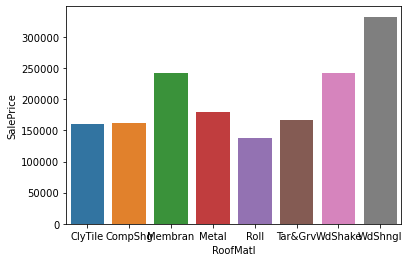

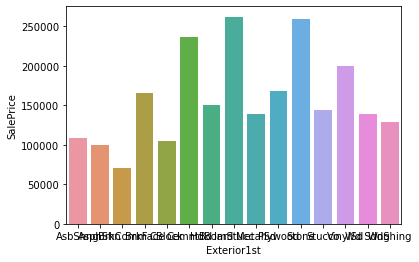

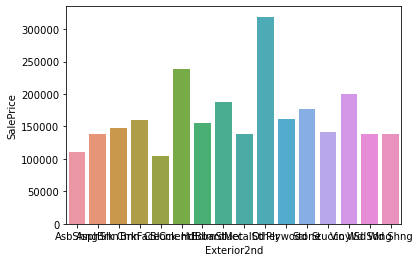

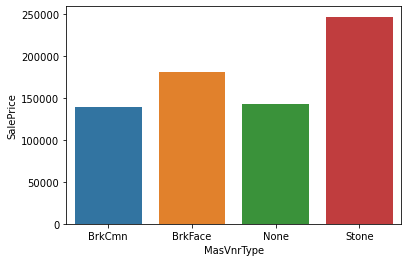

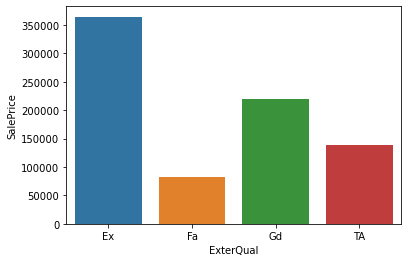

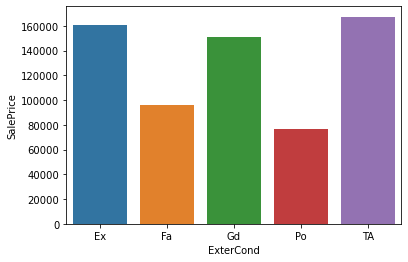

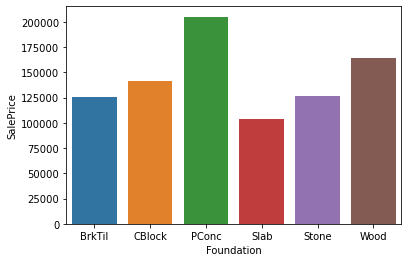

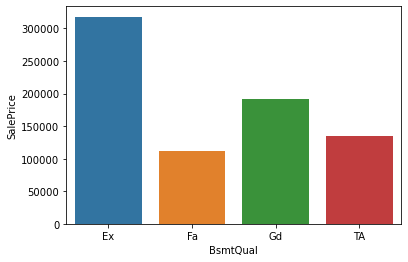

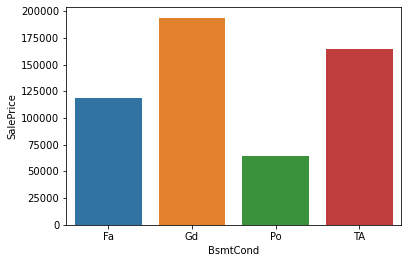

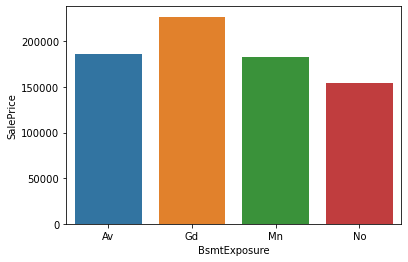

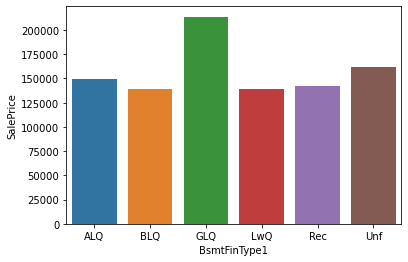

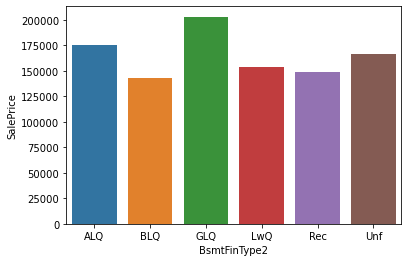

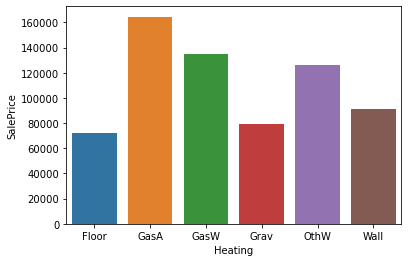

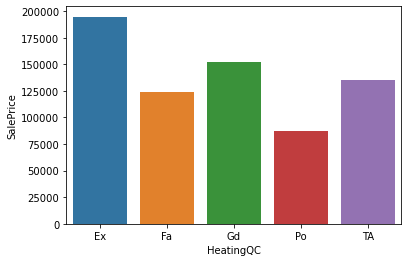

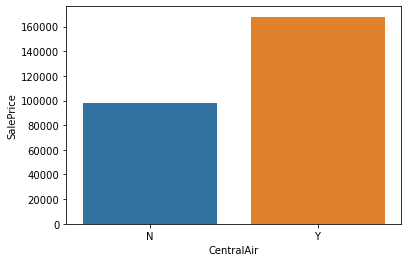

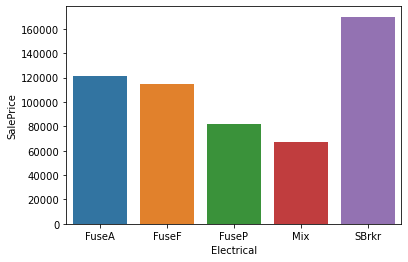

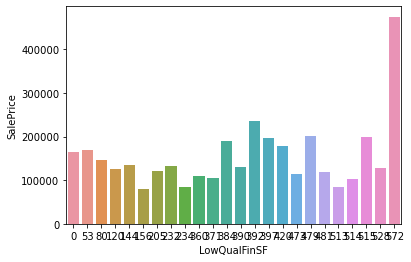

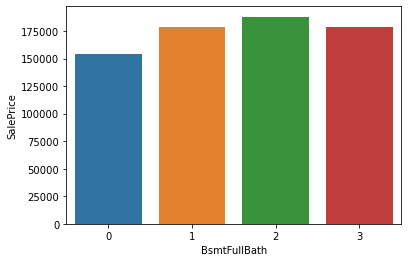

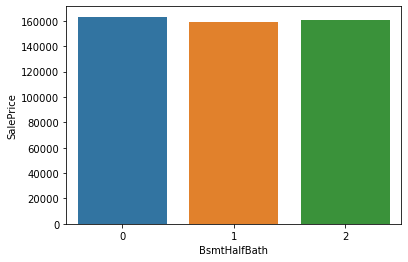

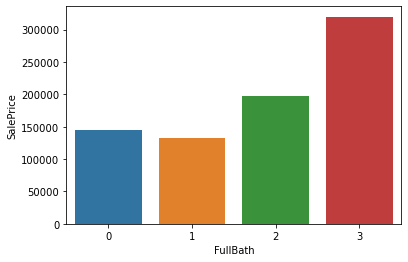

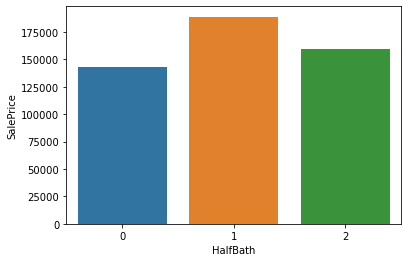

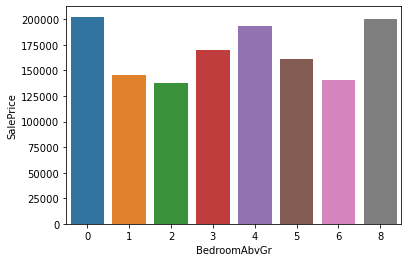

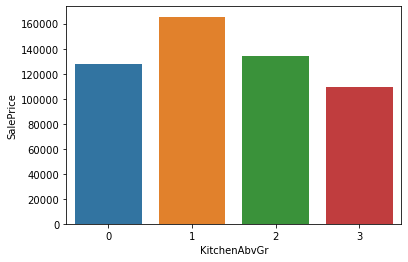

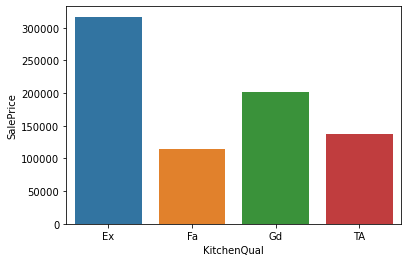

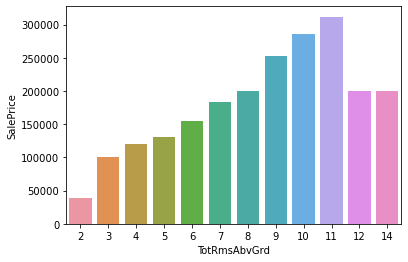

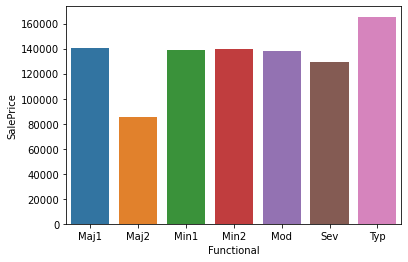

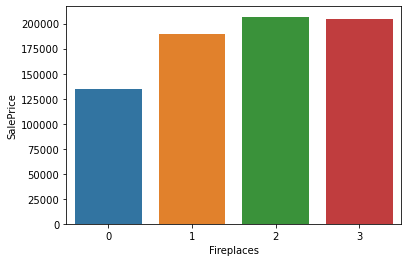

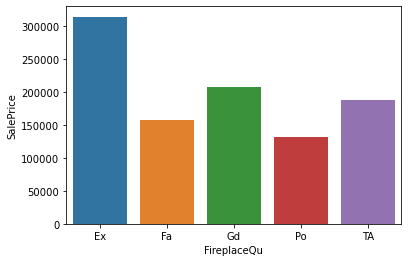

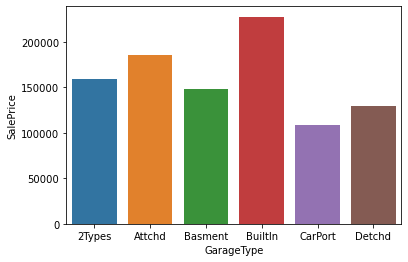

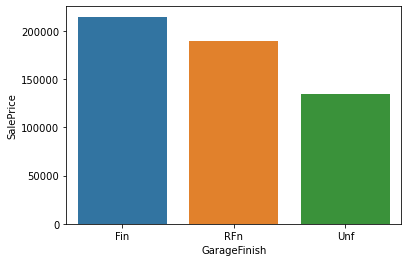

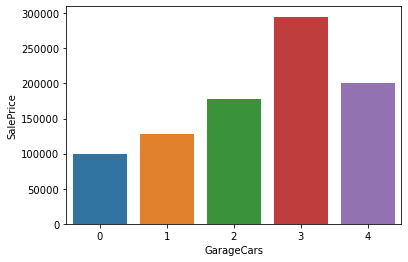

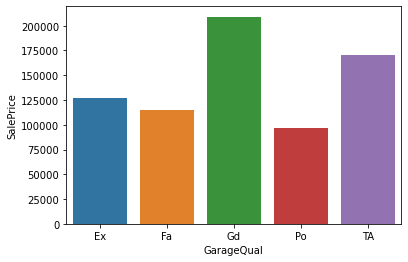

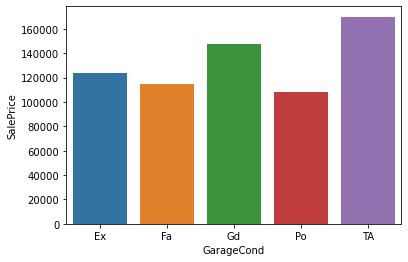

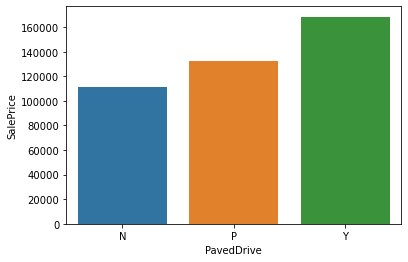

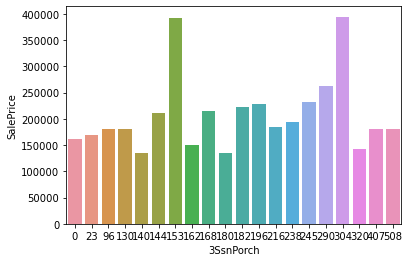

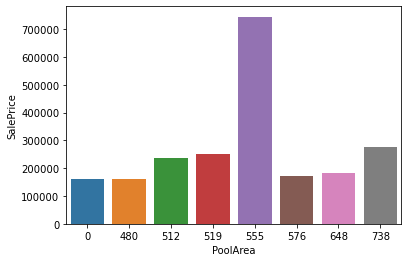

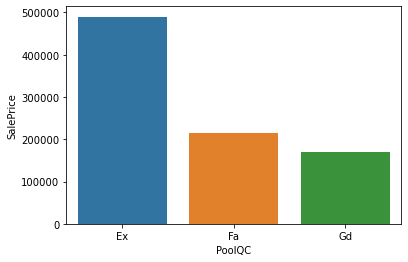

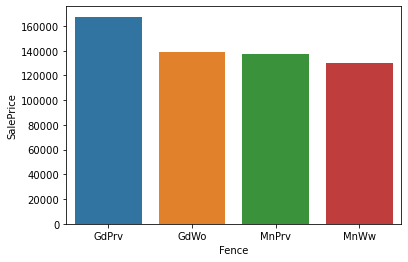

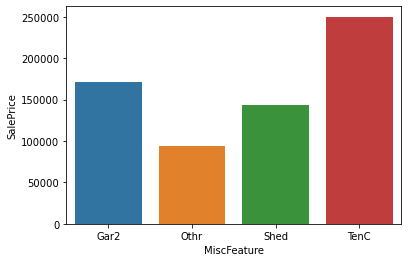

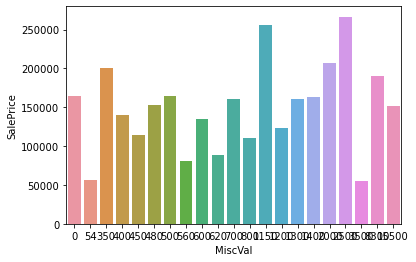

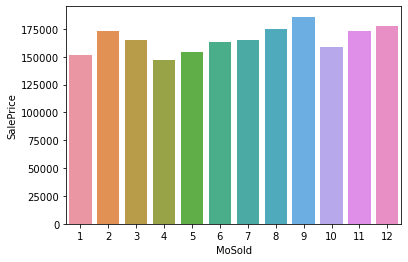

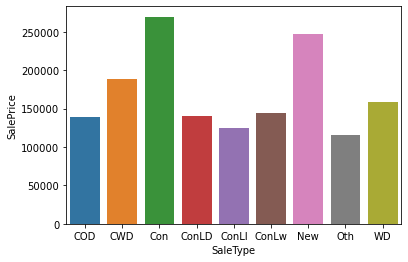

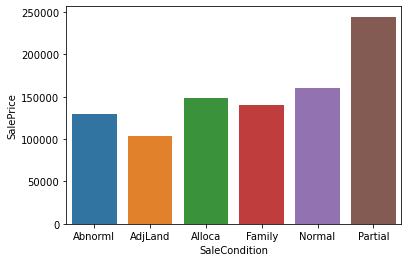

In [90]:
for features in discrete_feature:
    b=data.groupby(features)['SalePrice'].median().reset_index()
    sns.barplot(x=features ,y = 'SalePrice',data=b)
    plt.show()

In [98]:
cont_feature=[i for i in feature_with_numerical if i not in discrete_feature and i not in date_time_feature and i not in ["Id"]]
print("no of cont features is {}".format(len(cont_feature)))
cont_feature

no of cont features is 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

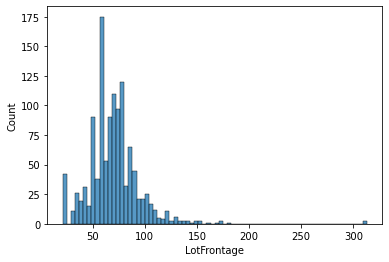

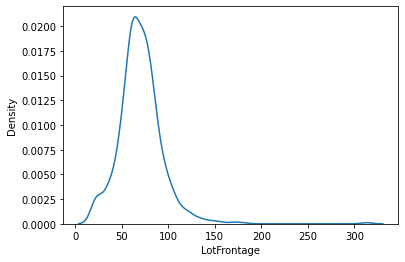

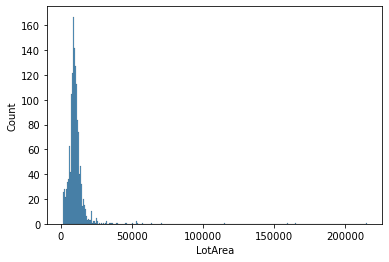

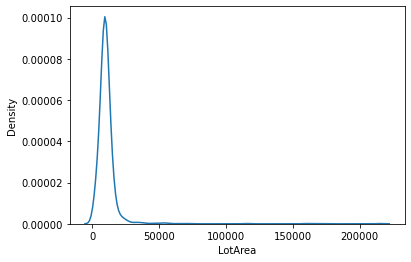

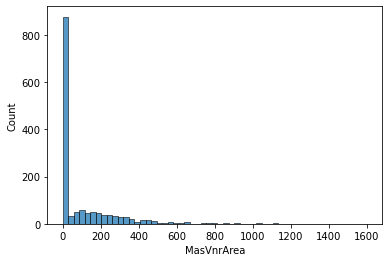

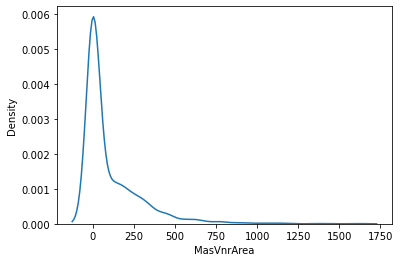

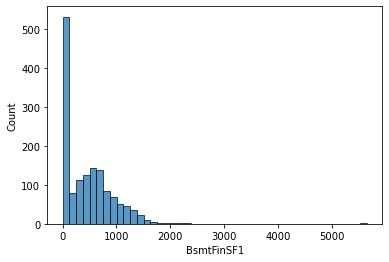

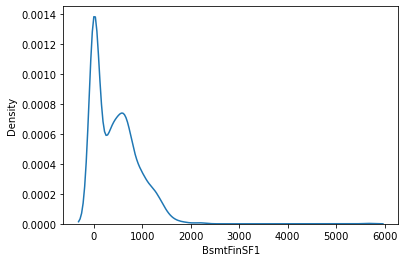

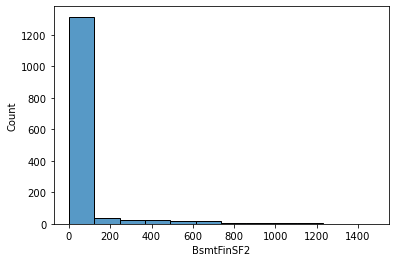

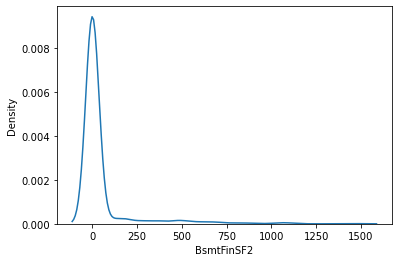

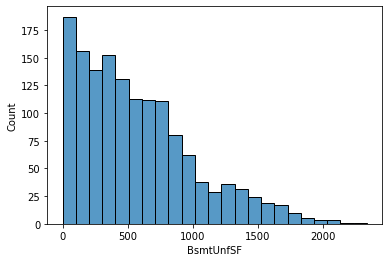

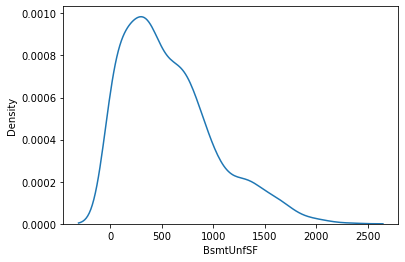

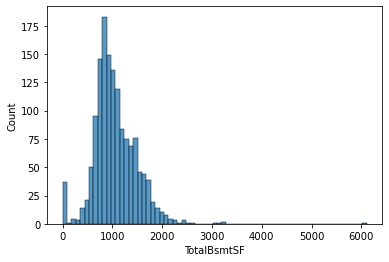

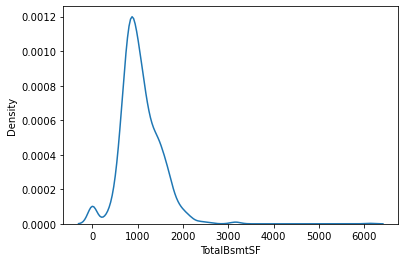

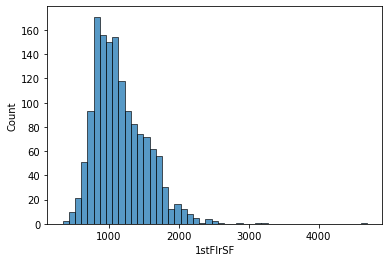

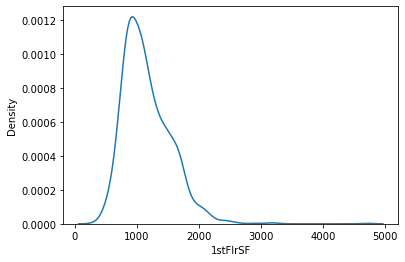

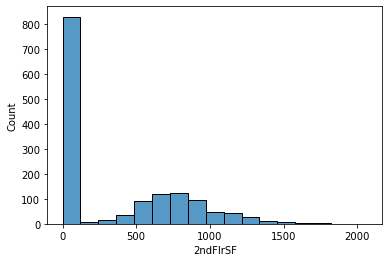

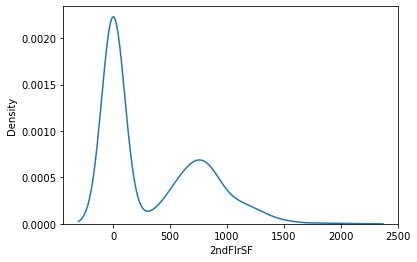

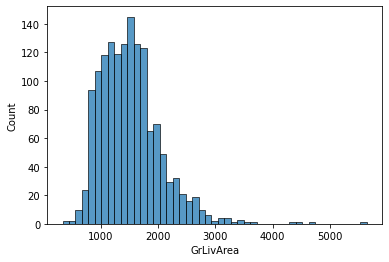

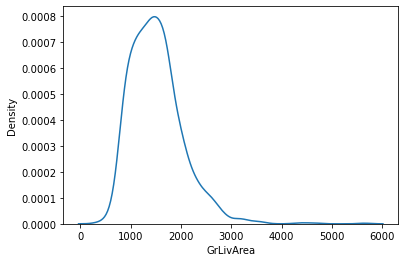

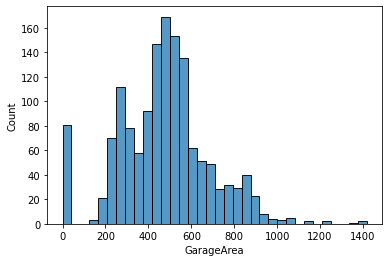

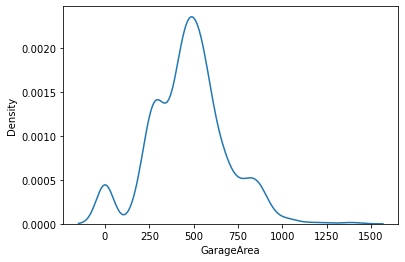

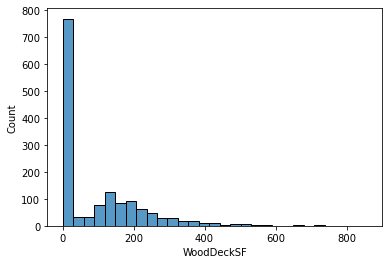

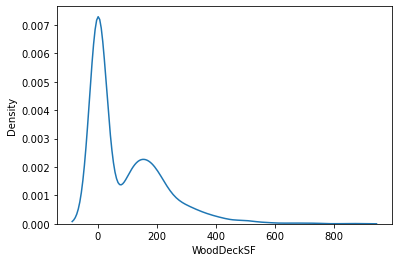

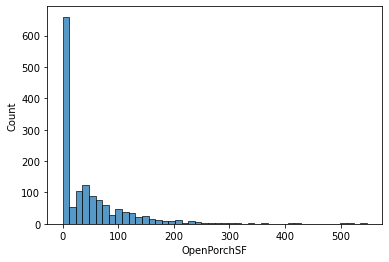

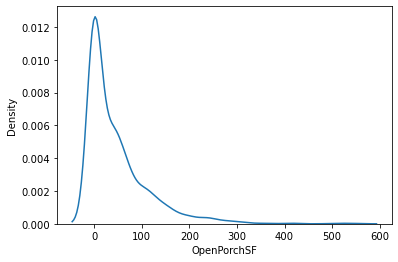

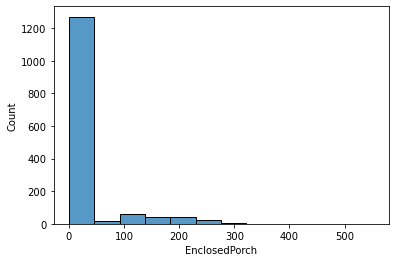

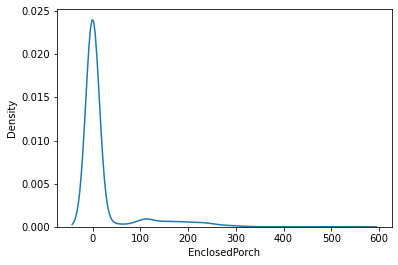

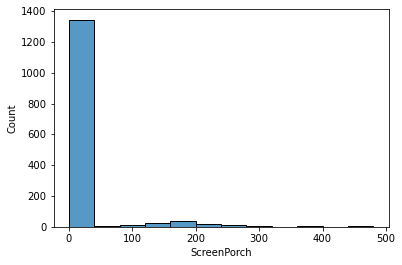

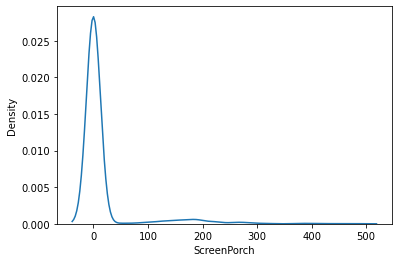

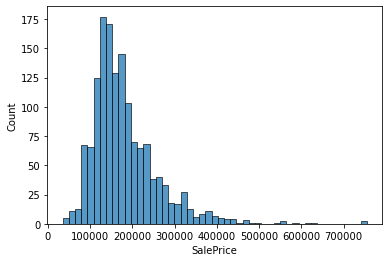

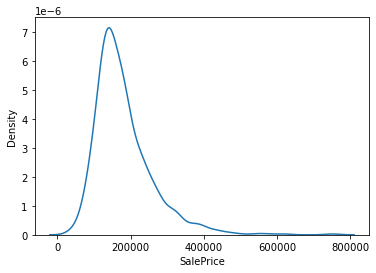

In [103]:
for features in cont_feature:
    sns.histplot(data[features])
    plt.show()
    sns.kdeplot(data[features])
    plt.show()

In [104]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


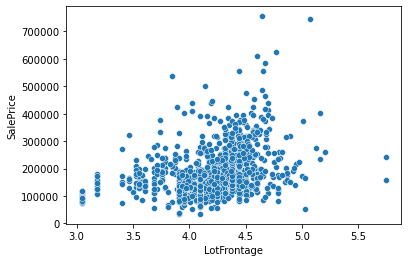

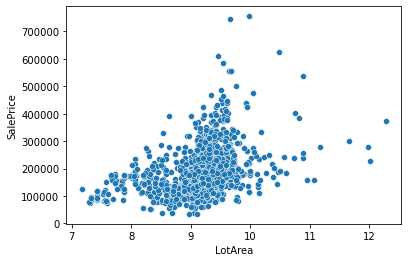

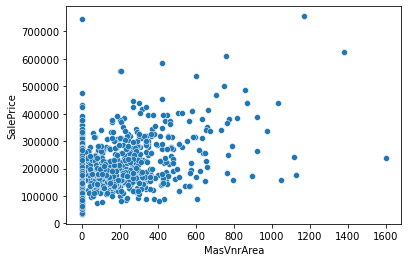

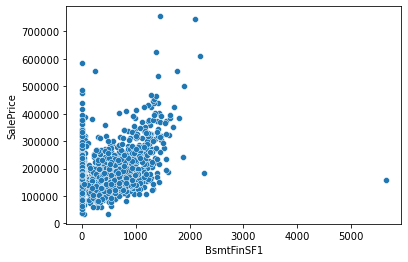

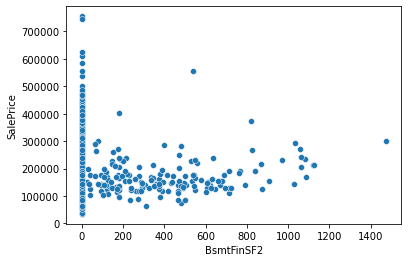

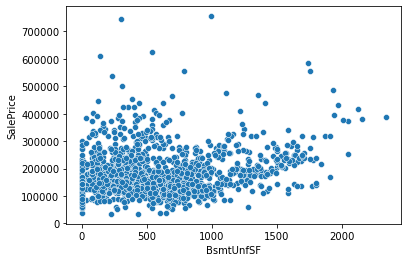

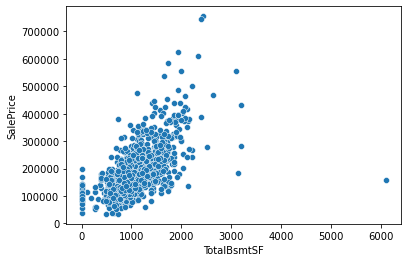

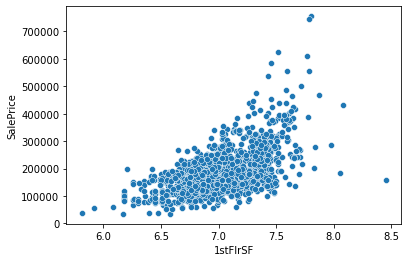

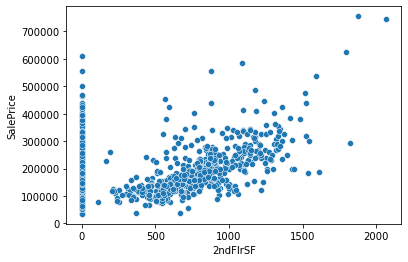

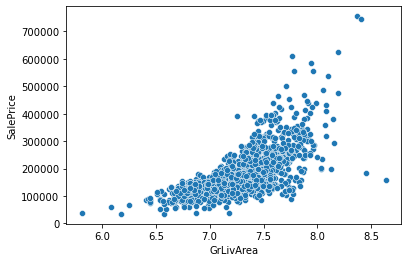

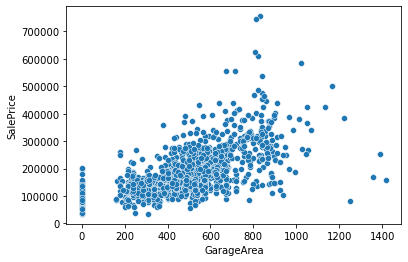

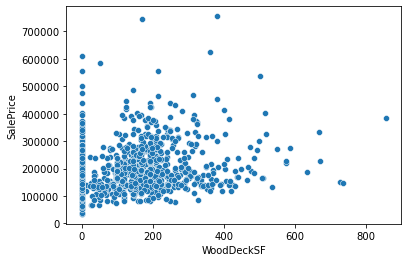

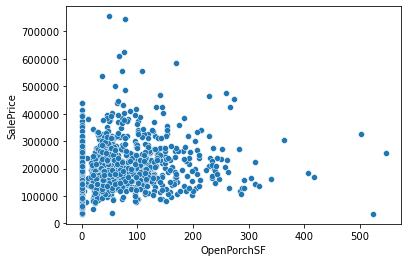

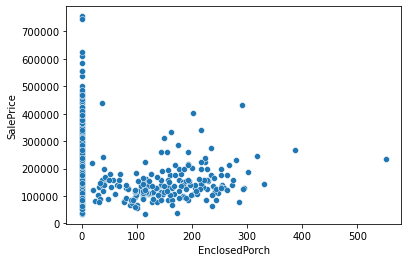

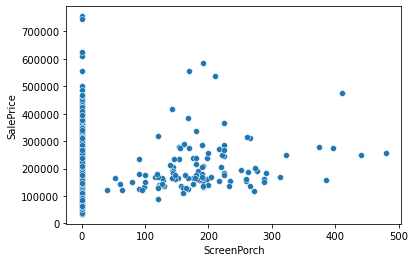

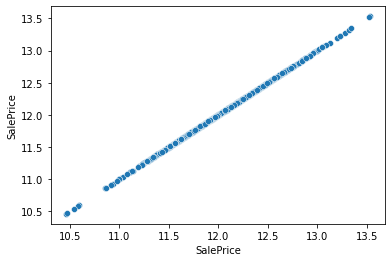

In [107]:
data=df.copy()
for features in cont_feature:
    if  0 in data[features].unique():
        pass
    else:
        data[features] = np.log( data[features])
    sns.scatterplot(x=features,y = 'SalePrice',data=data)
    plt.show()
    

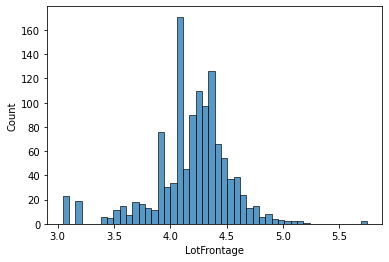

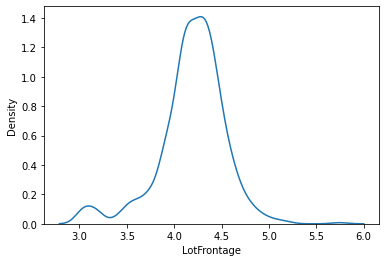

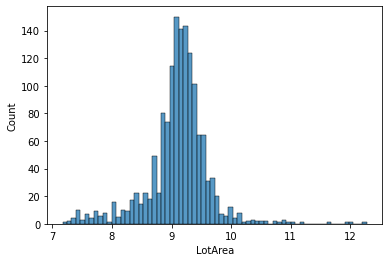

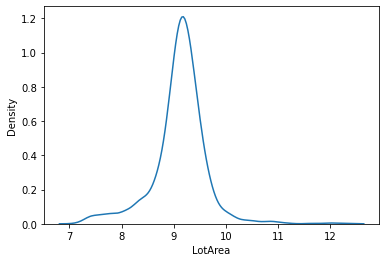

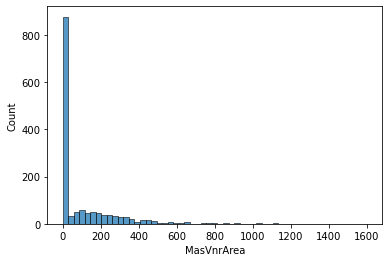

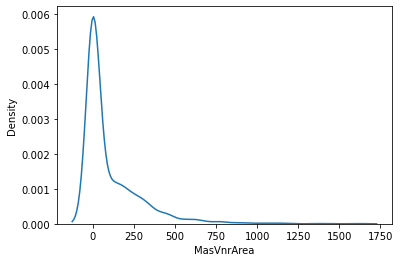

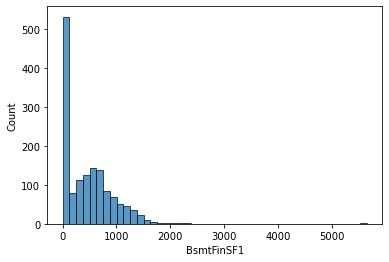

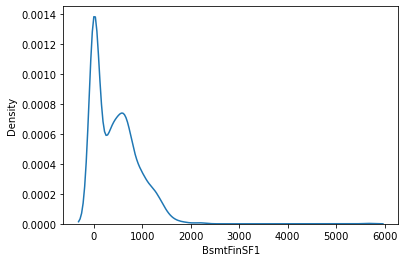

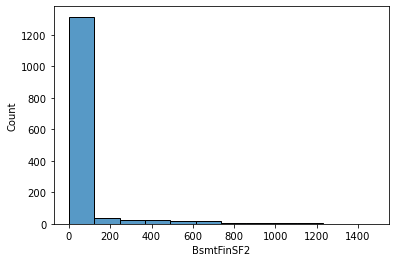

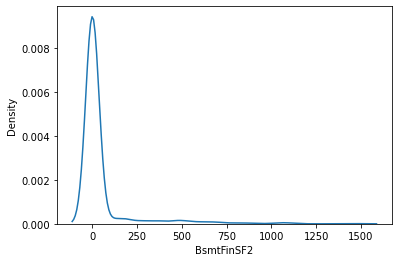

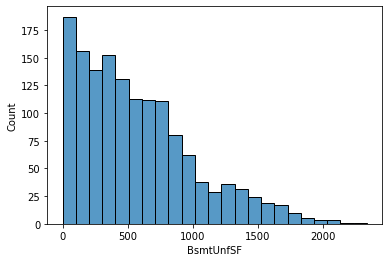

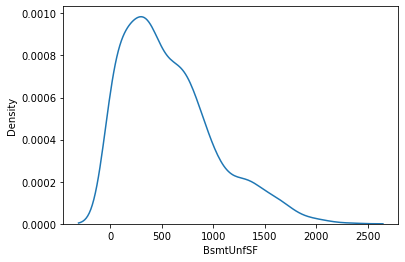

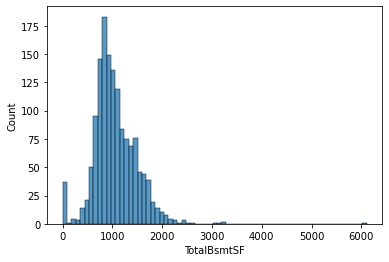

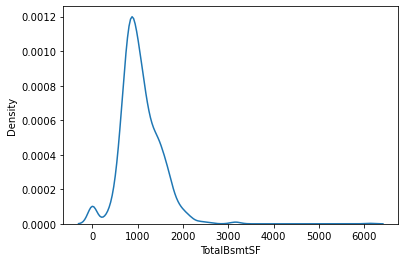

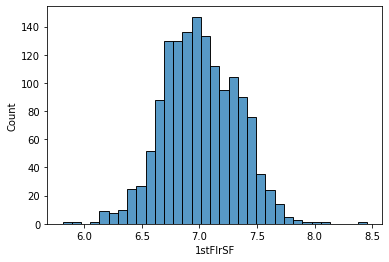

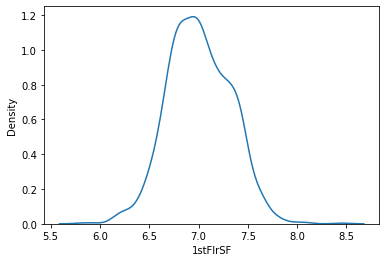

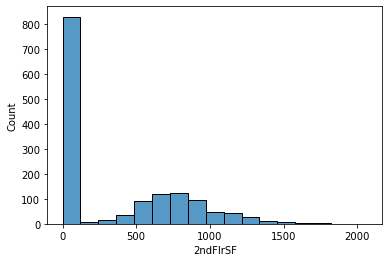

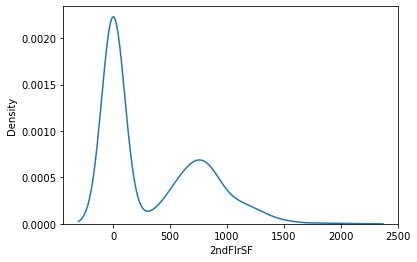

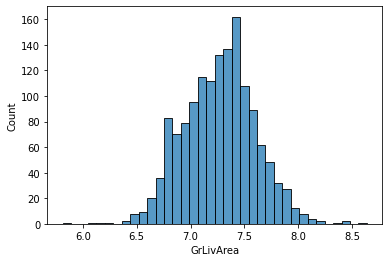

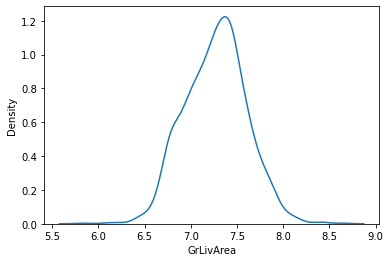

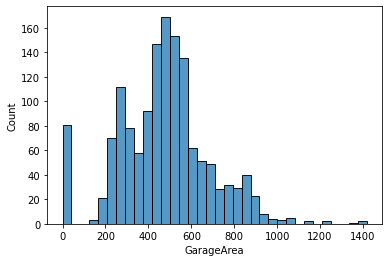

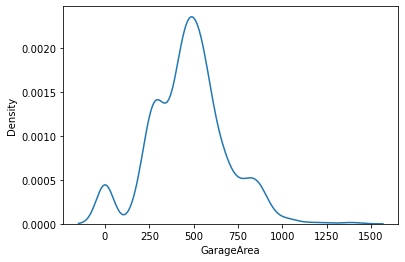

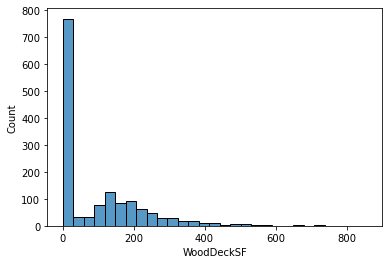

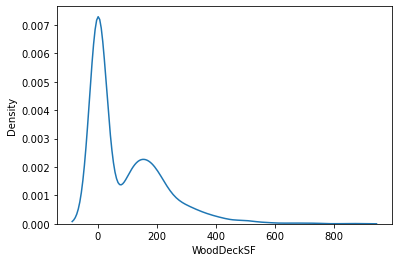

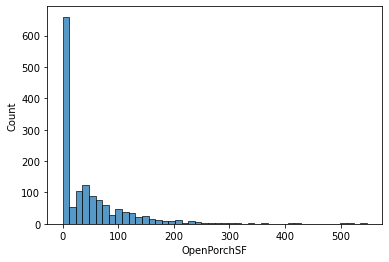

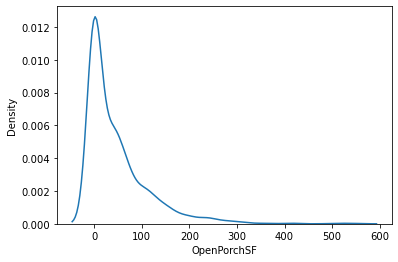

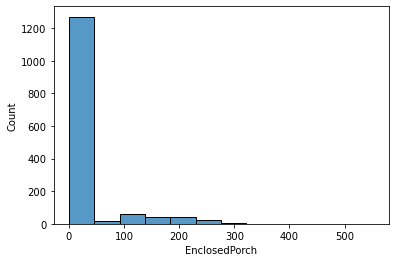

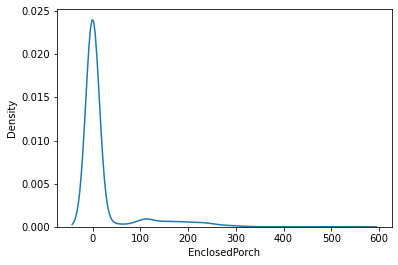

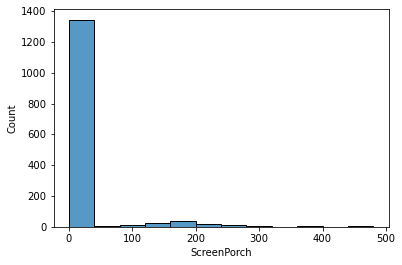

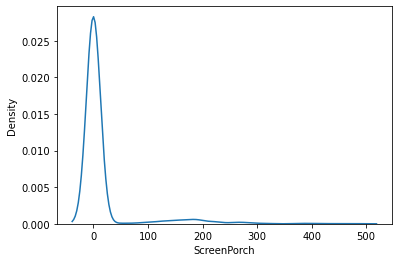

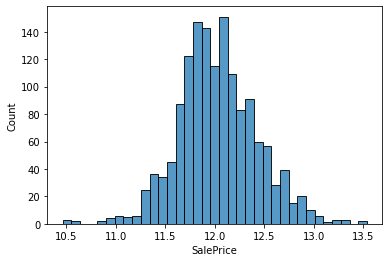

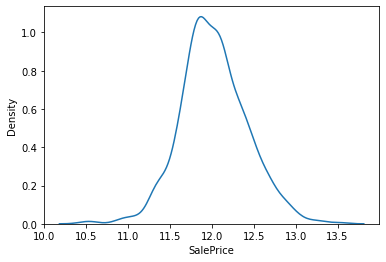

In [108]:
for features in cont_feature:
    sns.histplot(data[features])
    plt.show()
    sns.kdeplot(data[features])
    plt.show()

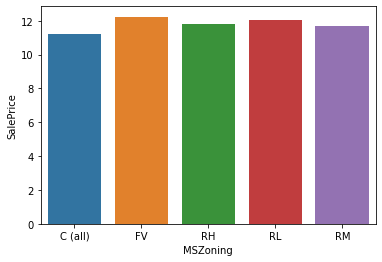

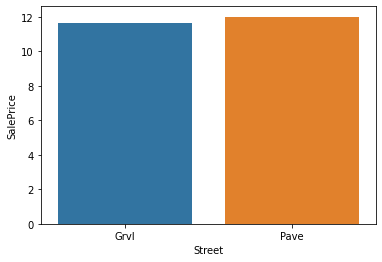

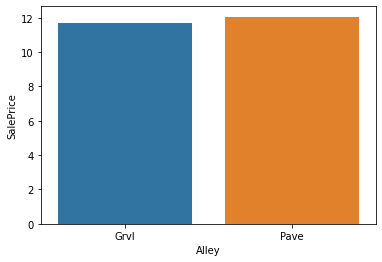

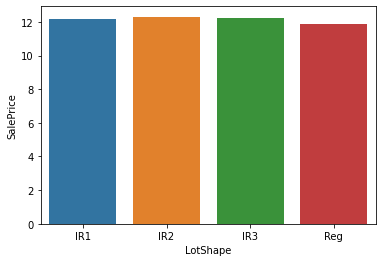

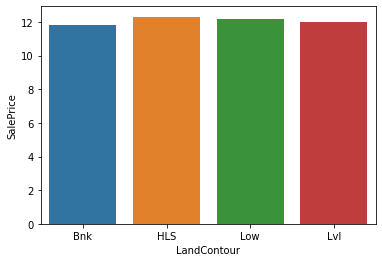

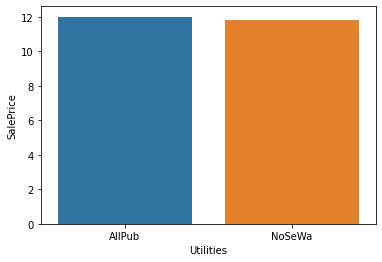

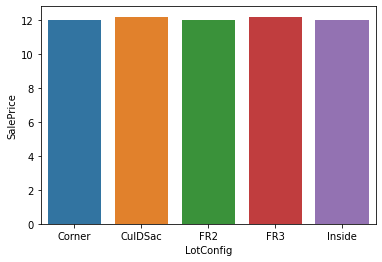

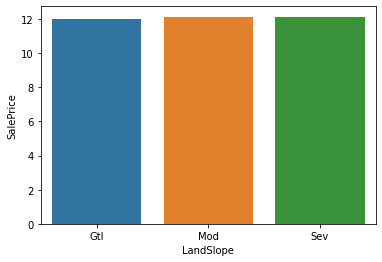

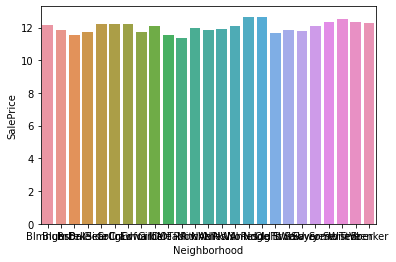

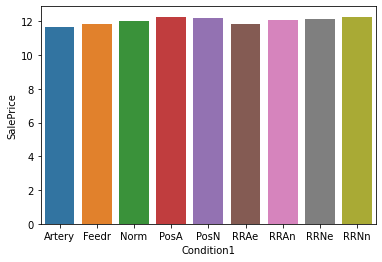

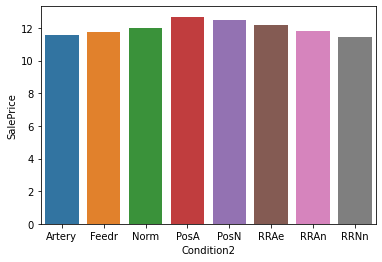

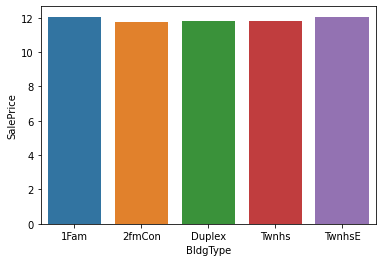

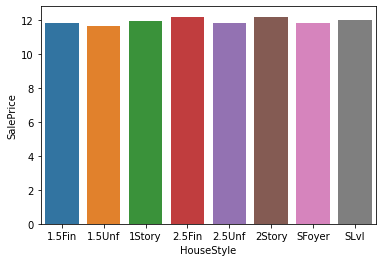

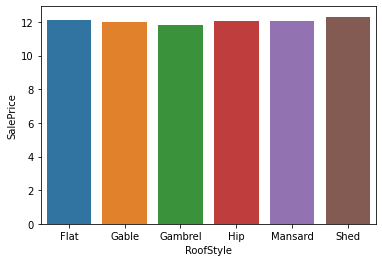

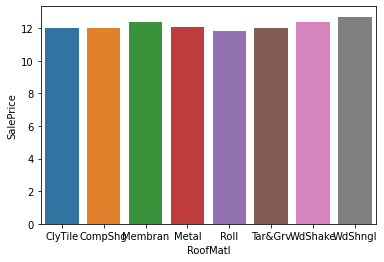

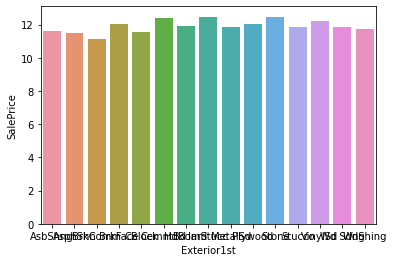

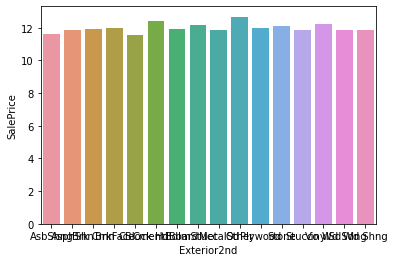

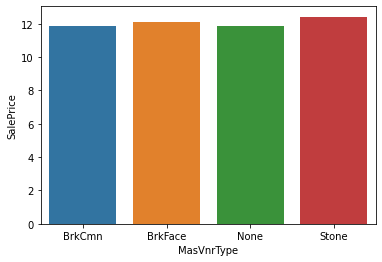

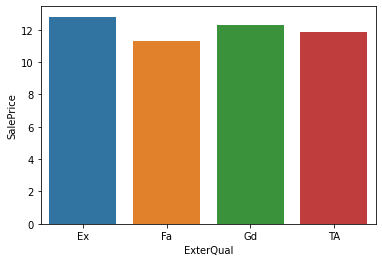

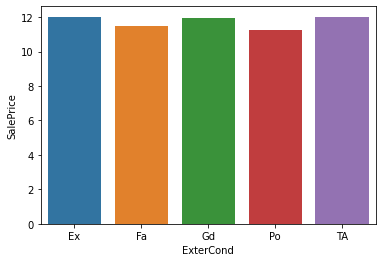

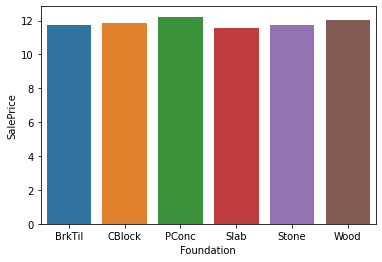

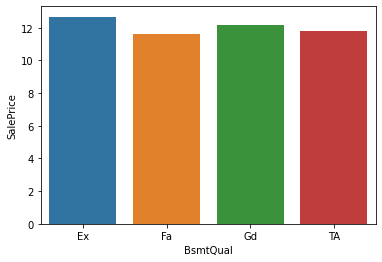

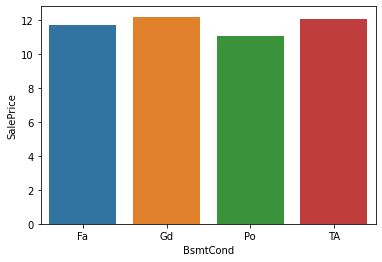

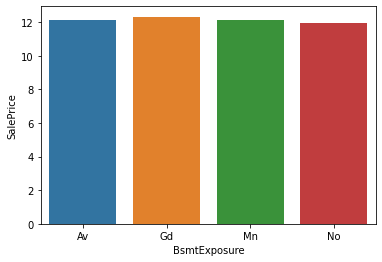

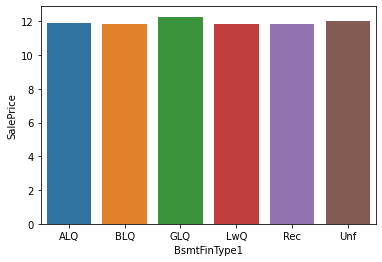

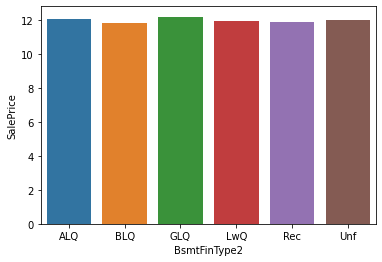

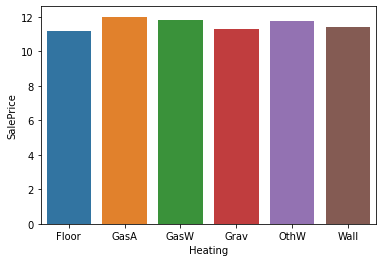

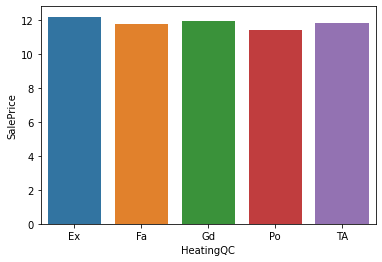

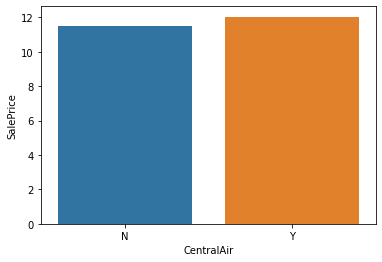

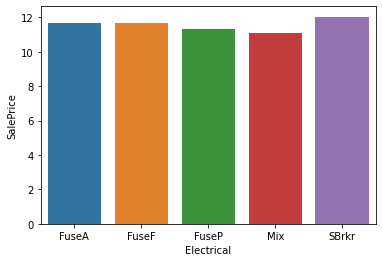

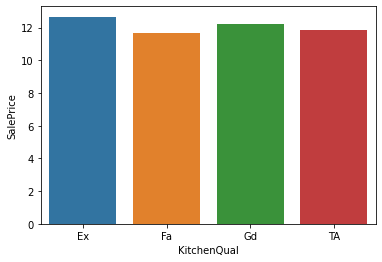

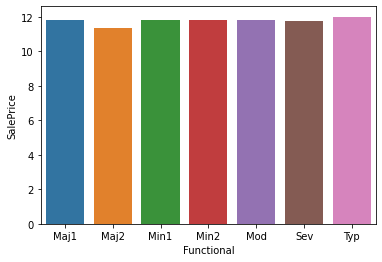

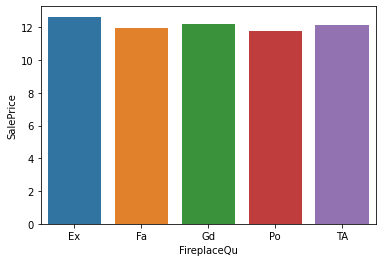

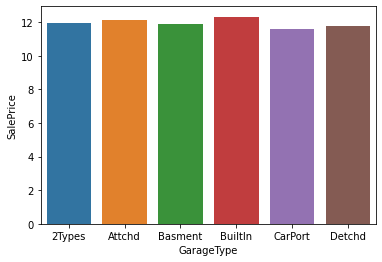

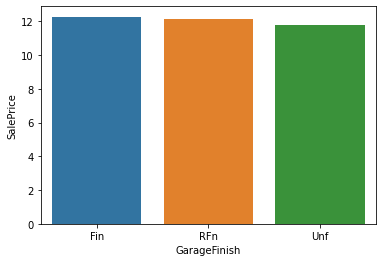

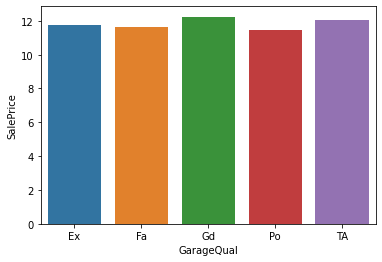

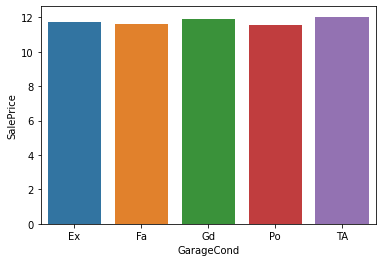

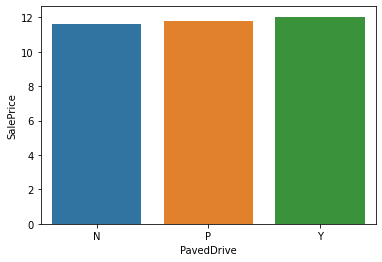

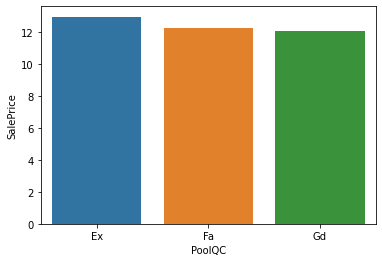

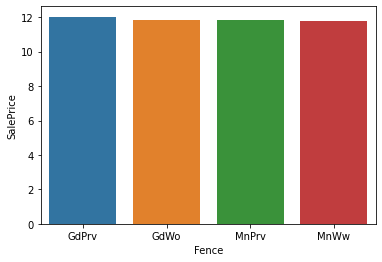

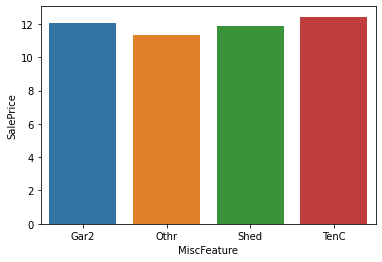

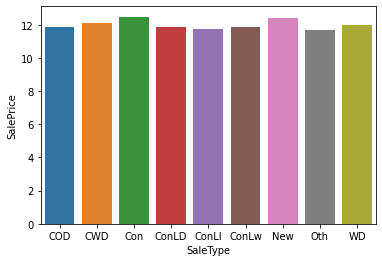

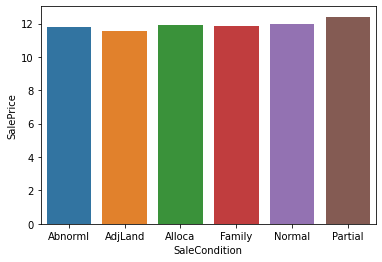

In [111]:
categorical_feat=[i for i in df.columns if df[i].dtypes == 'O']
for features in categorical_feat :
    c=data.groupby(features)['SalePrice'].median().reset_index()
    sns.barplot(x=features ,y = 'SalePrice',data=c)
    plt.show()

In [134]:
categorical_missing_feat = [i for i in categorical_feat if df[i].isnull().sum()>0]
for features in categorical_missing_feat :
    df[features]=np.where(df[features].isnull().sum()>0 ,"Missing",df[features])
    
for features in cont_feature: 
    df[features].fillna(df[features].median())  
    df[features+"nan"]=np.where(df[features].isnull().sum()>0,1,0)

In [135]:
for features in date_time_feature:
    if features!='YrSold':
        df[features] = df['YrSold']-data[features]
        

In [136]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,Missing,196.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,706,Missing,0,150,856,GasA,Ex,Y,Missing,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Missing,5.0,Missing,2,548,Missing,Missing,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Missing,Missing,Missing,Missing,978,Missing,0,284,1262,GasA,Ex,Y,Missing,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Missing,Missing,31.0,Missing,2,460,Missing,Missing,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,Missing,162.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,486,Missing,0,434,920,GasA,Ex,Y,Missing,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Missing,Missing,7.0,Missing,2,608,Missing,Missing,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,Missing,Missing,Missing,Missing,216,Missing,0,540,756,GasA,Gd,Y,Missing,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Missing,Missing,8.0,Missing,3,642,Missing,Missing,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,Missing,350.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,655,Missing,0,490,1145,GasA,Ex,Y,Missing,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Missing,Missing,8.0,Missing,3,836,Missing,Missing,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,PConc,Missing,Missing,Missing,Missing,0,Missing,0,953,953,GasA,Ex,Y,Missing,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Missing,Missing,8.0,Missing,2,460,Missing,Missing,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gt

In [165]:
data=df.copy()
for features in categorical_feat:
    g=df.groupby(features)["Id"].count().reset_index()
    i=g[g["Id"]/len(df)<0.01].set_index(features)
    temp=list(i.index)
    data[features]=np.where(data[features].isin(temp),"Rare_var",data[features])

In [186]:
data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,Missing,196.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,706,Missing,0,150,856,GasA,Ex,Y,Missing,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Missing,5.0,Missing,2,548,Missing,Missing,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Missing,Missing,Missing,Missing,978,Missing,0,284,1262,GasA,Ex,Y,Missing,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Missing,Missing,31.0,Missing,2,460,Missing,Missing,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,Missing,162.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,486,Missing,0,434,920,GasA,Ex,Y,Missing,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Missing,Missing,7.0,Missing,2,608,Missing,Missing,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,Missing,Missing,Missing,Missing,216,Missing,0,540,756,GasA,Gd,Y,Missing,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Missing,Missing,8.0,Missing,3,642,Missing,Missing,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,Missing,350.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,655,Missing,0,490,1145,GasA,Ex,Y,Missing,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Missing,Missing,8.0,Missing,3,836,Missing,Missing,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Rare_var,Missing,Missing,Missing,Missing,732,Missing,0,64,796,GasA,Ex,Y,Missing,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Missing,16.0,Missing,2,480,Missing,Missing,Y,40,30,0,320,0,0,Missing,Missing,Missing,700,10,2009,WD,Normal,143000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Missing,186.0,Gd,TA,PConc,Missing,Missing,Missing,Missing,1369,Missing,0,317,1686,GasA,Ex,Y,Missing,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Missing,Missing,3.0,Missing,2,636,Missing,Missing,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,60,RL,NaN,10382,Pave,Missing,

In [167]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [154]:
g

,SaleCondition,Id
0,Abnorml,101
1,AdjLand,4
2,Alloca,12
3,Family,20
4,Normal,1198
5,Partial,125


In [163]:
i

,Id
SaleCondition,
AdjLand,4
Alloca,12


In [168]:
type(i)

pandas.core.frame.DataFrame

In [164]:
temp

['AdjLand', 'Alloca']

In [188]:
for features in categorical_feat:
    gg=df.groupby(features)["Id"].count()/len(df)
    tempp=gg[gg<0.01].index
    df[features]=np.where(df[features].isin(tempp),"Rare_var",df[features])

In [171]:
gg

SaleCondition
Abnorml    0.069178
AdjLand    0.002740
Alloca     0.008219
Family     0.013699
Normal     0.820548
Partial    0.085616
Name: Id, dtype: float64

In [182]:
gg.values

array([0.06917808, 0.00273973, 0.00821918, 0.01369863, 0.82054795,
       0.08561644])

In [191]:
for features in categorical_feat:
    re=df[features].value_counts().to_dict()
    df[features]=df[features].map(re)

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaler_features =[i for i in df.columns if i not in ["Id","SalePrice"]]
scaler=MinMaxScaler()
scaler.fit(df[scaler_features])

MinMaxScaler()

In [194]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1,60,1151,65.0,8450,1454,1460,925,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,5,5,1141,1434,515,504,1460,196.0,488,1282,647,1460,1460,1460,1460,706,1460,0,150,856,1428,741,1365,1460,856,854,0,1710,1,0,2,1,3,1,586,8,1360,0,1460,1460,5.0,1460,2,548,1460,1460,1340,0,61,0,0,0,0,1460,1460,1460,0,2,2008,1267,1198,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,1151,80.0,9600,1454,1460,925,1311,1459,47,1382,22,81,1445,1220,726,6,8,31,31,1141,1434,220,214,1460,0.0,906,1282,634,1460,1460,1460,1460,978,1460,0,284,1262,1428,741,1365,1460,1262,0,0,1262,0,1,2,0,3,1,735,6,1360,1,1460,1460,31.0,1460,2,460,1460,1460,1340,298,0,0,0,0,0,1460,1460,1460,0,5,2007,1267,1198,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,1151,68.0,11250,1454,1460,484,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,7,6,1141,1434,515,504,1460,162.0,488,1282,647,1460,1460,1460,1460,486,1460,0,434,920,1428,741,1365,1460,920,866,0,1786,1,0,2,1,3,1,586,6,1360,1,1460,1460,7.0,1460,2,608,1460,1460,1340,0,42,0,0,0,0,1460,1460,1460,0,9,2008,1267,1198,223500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,1151,60.0,9550,1454,1460,484,1311,1459,263,1382,51,1260,1445,1220,445,7,5,91,36,1141,1434,206,38,1460,0.0,906,1282,146,1460,1460,1460,1460,216,1460,0,540,756,1428,241,1365,1460,961,756,0,1717,1,0,1,0,3,1,586,7,1360,1,1460,1460,8.0,1460,3,642,1460,1460,1340,0,35,272,0,0,0,1460,1460,1460,0,2,2006,1267,101,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,1151,84.0,14260,1454,1460,484,1311,1459,47,1382,41,1260,1445,1220,445,8,5,8,8,1141,1434,515,504,1460,350.0,488,1282,647,1460,1460,1460,1460,655,1460,0,490,1145,1428,741,1365,1460,1145,1053,0,2198,1,0,2,1,4,1,586,9,1360,1,1460,1460,8.0,1460,3,836,1460,1460,1340,192,84,0,0,0,0,1460,1460,1460,0,12,2008,1267,1198,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,50,1151,85.0,14115,1454,1460,484,1311,1459,1052,1382,49,1260,1445,1220,154,5,5,16,14,1141,1434,515,504,1460,0.0,906,1282,9,1460,1460,1460,1460,732,1460,0,64,796,1428,741,1365,1460,796,566,0,1362,1,0,1,1,1,1,735,5,1360,0,1460,1460,16.0,1460,2,480,1460,1460,1340,40,30,0,320,0,0,1460,1460,1460,700,10,2009,1267,1198,143000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,20,1151,75.0,10084,1454,1460,925,1311,1459,1052,1382,86,1260,1445,1220,726,8,5,3,2,1141,1434,515,504,1460,186.0,488,1282,647,1460,1460,1460,1460,1369,1460,0,317,1686,1428,741,1365,1460,1694,0,0,1694,1,0,2,0,3,1,586,7,1360,1,1460,1460,3.0,1460,2,636,1460,1460,1340,255,57,0,0,0,0,1460,1460,1460,0,8,2007,1267,1198,307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,60,1151,NaN,10382,1454,1460,484,1311,1459,263,1382,73,19,1445,1220,445,7,6,36,36,1141,1434,222,207,1460,240.0,906,1282,634,1460,1460,1460,1460,859,1460,32,216,1107,1428,741,1365,1460,1107,983,0,2090,1,0,2,1,3,1,735,7,1360,2,1460,1460,36.0,1460,2,484,1460,1460,1340,235,204,228,0,0,0,1460,1460,1460,350,11,2009,1267,1198,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,50,218,51.0,6120,1454,1460,925,1311,1459,1052,1382,113,48,1445,1220,154,7,5,77,58,1

In [218]:
df1=df[["Id","SalePrice"]]
df1.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [219]:
df2=pd.DataFrame(scaler.transform(df[scaler_features]), columns=scaler_features)
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,0.235294,1.0,0.150685,0.033420,1.0,0.0,1.000000,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.000000,1.000000,0.0,0.12250,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.000000,1.0,0.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.500000,1.0,0.000000,0.0,0.0,0.046729,0.0,0.50,0.386460,0.0,0.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.202055,0.038795,1.0,0.0,1.000000,1.0,1.0,0.041031,1.0,0.028708,0.04996,1.0,1.0,1.000000,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.419291,0.400826,0.0,0.00000,1.00000,1.0,0.979624,0.0,0.0,0.0,0.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.000000,1.0,0.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.00000,0.333333,1.0,0.333333,0.0,0.0,0.289720,0.0,0.50,0.324401,0.0,0.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,1.0,0.160959,0.046507,1.0,0.0,0.518033,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.000000,1.000000,0.0,0.10125,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.000000,1.0,0.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.333333,1.0,0.333333,0.0,0.0,0.065421,0.0,0.50,0.428773,0.0,0.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,1.0,0.133562,0.038561,1.0,0.0,0.518033,1.0,1.0,0.247137,1.0,0.167464,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.391732,0.037190,0.0,0.00000,1.00000,1.0,0.214734,0.0,0.0,0.0,0.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.324324,1.0,0.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.78592,0.416667,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.071912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,1.0,0.215753,0.060576,1.0,0.0,0.518033,1.0,1.0,0.041031,1.0,0.119617,1.00000,1.0,1.0,0.594517,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.000000,1.000000,0.0,0.21875,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.000000,1.0,0.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.78592,0.583333,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.589563,0.0,0.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
df1.append(df2).head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1.0,208500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,181500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,223500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
pd.concat([df2,df1],axis=1).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan,Id,SalePrice
0,0.235294,1.0,0.150685,0.033420,1.0,0.0,1.000000,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.000000,1.000000,0.0,0.12250,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.000000,1.0,0.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.500000,1.0,0.000000,0.0,0.0,0.046729,0.0,0.50,0.386460,0.0,0.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,208500
1,0.000000,1.0,0.202055,0.038795,1.0,0.0,1.000000,1.0,1.0,0.041031,1.0,0.028708,0.04996,1.0,1.0,1.000000,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.419291,0.400826,0.0,0.00000,1.00000,1.0,0.979624,0.0,0.0,0.0,0.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.000000,1.0,0.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.00000,0.333333,1.0,0.333333,0.0,0.0,0.289720,0.0,0.50,0.324401,0.0,0.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,181500
2,0.235294,1.0,0.160959,0.046507,1.0,0.0,0.518033,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.000000,1.000000,0.0,0.10125,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.000000,1.0,0.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.333333,1.0,0.333333,0.0,0.0,0.065421,0.0,0.50,0.428773,0.0,0.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,223500
3,0.294118,1.0,0.133562,0.038561,1.0,0.0,0.518033,1.0,1.0,0.247137,1.0,0.167464,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.391732,0.037190,0.0,0.00000,1.00000,1.0,0.214734,0.0,0.0,0.0,0.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.324324,1.0,0.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.78592,0.416667,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.071912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,140000
4,0.235294,1.0,0.215753,0.060576,1.0,0.0,0.518033,1.0,1.0,0.041031,1.0,0.119617,1.00000,1.0,1.0,0.594517,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.000000,1.000000,0.0,0.21875,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.000000,1.0,0.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.78592,0.583333,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.589563,0.0,0.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,250000


In [228]:
pd.concat([df[["Id","SalePrice"]],
          pd.DataFrame(scaler.transform(df[scaler_features]), columns=scaler_features)],axis=1).head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1,208500,0.235294,1.0,0.150685,0.033420,1.0,0.0,1.000000,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.000000,1.000000,0.0,0.12250,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.000000,1.0,0.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.500000,1.0,0.000000,0.0,0.0,0.046729,0.0,0.50,0.386460,0.0,0.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,181500,0.000000,1.0,0.202055,0.038795,1.0,0.0,1.000000,1.0,1.0,0.041031,1.0,0.028708,0.04996,1.0,1.0,1.000000,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.419291,0.400826,0.0,0.00000,1.00000,1.0,0.979624,0.0,0.0,0.0,0.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.000000,1.0,0.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.00000,0.333333,1.0,0.333333,0.0,0.0,0.289720,0.0,0.50,0.324401,0.0,0.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,223500,0.235294,1.0,0.160959,0.046507,1.0,0.0,0.518033,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.000000,1.000000,0.0,0.10125,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.000000,1.0,0.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.333333,1.0,0.333333,0.0,0.0,0.065421,0.0,0.50,0.428773,0.0,0.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,140000,0.294118,1.0,0.133562,0.038561,1.0,0.0,0.518033,1.0,1.0,0.247137,1.0,0.167464,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.391732,0.037190,0.0,0.00000,1.00000,1.0,0.214734,0.0,0.0,0.0,0.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.324324,1.0,0.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.78592,0.416667,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.071912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,250000,0.235294,1.0,0.215753,0.060576,1.0,0.0,0.518033,1.0,1.0,0.041031,1.0,0.119617,1.00000,1.0,1.0,0.594517,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.000000,1.000000,0.0,0.21875,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.000000,1.0,0.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.78592,0.583333,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.589563,0.0,0.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
df3=pd.concat([df[["Id","SalePrice"]],
          pd.DataFrame(scaler.transform(df[scaler_features]), columns=scaler_features)],axis=1)
df3.to_csv("houseprice_ml.csv")

In [230]:
df3.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alleynan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Electricalnan,FireplaceQunan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan
0,1,208500,0.235294,1.0,0.150685,0.033420,1.0,0.0,1.000000,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.000000,1.000000,0.0,0.12250,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.000000,1.0,0.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.500000,1.0,0.000000,0.0,0.0,0.046729,0.0,0.50,0.386460,0.0,0.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,181500,0.000000,1.0,0.202055,0.038795,1.0,0.0,1.000000,1.0,1.0,0.041031,1.0,0.028708,0.04996,1.0,1.0,1.000000,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.419291,0.400826,0.0,0.00000,1.00000,1.0,0.979624,0.0,0.0,0.0,0.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.000000,1.0,0.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.00000,0.333333,1.0,0.333333,0.0,0.0,0.289720,0.0,0.50,0.324401,0.0,0.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,223500,0.235294,1.0,0.160959,0.046507,1.0,0.0,0.518033,1.0,1.0,1.000000,1.0,0.641148,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.000000,1.000000,0.0,0.10125,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.000000,1.0,0.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.78592,0.333333,1.0,0.333333,0.0,0.0,0.065421,0.0,0.50,0.428773,0.0,0.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,140000,0.294118,1.0,0.133562,0.038561,1.0,0.0,0.518033,1.0,1.0,0.247137,1.0,0.167464,1.00000,1.0,1.0,0.594517,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.391732,0.037190,0.0,0.00000,1.00000,1.0,0.214734,0.0,0.0,0.0,0.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.324324,1.0,0.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.78592,0.416667,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.071912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,250000,0.235294,1.0,0.215753,0.060576,1.0,0.0,0.518033,1.0,1.0,0.041031,1.0,0.119617,1.00000,1.0,1.0,0.594517,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.000000,1.000000,0.0,0.21875,0.53139,1.0,1.000000,0.0,0.0,0.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.000000,1.0,0.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.78592,0.583333,1.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.589563,0.0,0.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
df3.isnull().mean()

Id                 0.000000
SalePrice          0.000000
MSSubClass         0.000000
MSZoning           0.000000
LotFrontage        0.177397
LotArea            0.000000
Street             0.000000
Alley              0.000000
LotShape           0.000000
LandContour        0.000000
Utilities          0.000000
LotConfig          0.000000
LandSlope          0.000000
Neighborhood       0.000000
Condition1         0.000000
Condition2         0.000000
BldgType           0.000000
HouseStyle         0.000000
OverallQual        0.000000
OverallCond        0.000000
YearBuilt          0.000000
YearRemodAdd       0.000000
RoofStyle          0.000000
RoofMatl           0.000000
Exterior1st        0.000000
Exterior2nd        0.000000
MasVnrType         0.000000
MasVnrArea         0.005479
ExterQual          0.000000
ExterCond          0.000000
Foundation         0.000000
BsmtQual           0.000000
BsmtCond           0.000000
BsmtExposure       0.000000
BsmtFinType1       0.000000
BsmtFinSF1         0

In [232]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   int64  
 3   LotFrontage      1201 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   int64  
 6   Alley            1460 non-null   int64  
 7   LotShape         1460 non-null   int64  
 8   LandContour      1460 non-null   int64  
 9   Utilities        1460 non-null   int64  
 10  LotConfig        1460 non-null   int64  
 11  LandSlope        1460 non-null   int64  
 12  Neighborhood     1460 non-null   int64  
 13  Condition1       1460 non-null   int64  
 14  Condition2       1460 non-null   int64  
 15  BldgType         1460 non-null   int64  
 16  HouseStyle       1460 non-null   int64  
 17  OverallQual   